<a href="https://colab.research.google.com/github/cyuancheng/Machine_Learning_Practice/blob/master/ML_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MissingDate

select data type

In [0]:
# numerical feature
num_cols = loan_data.select_dtypes(include=['number'])
num_cols = loan_data.select_dtypes(include=[np.number])
# categorical deature
cat_cols = loan_data.select_dtypes(include=['category'])

cat_cols = loan_data.select_dtypes(include=[object])
# datetime deature
datetime_cols = loan_data.select_dtypes(include=['datetime'])


imputer

In [0]:
# Import imputer module
from sklearn.impute import SimpleImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)

# Check for missing values
print(loans_imp_meanDF.info())

Iterative imputation (sklearn [document](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) )


In [0]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Iteratively impute
imp_iter = IterativeImputer(max_iter =5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols )

# Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)


## Data distributions and transformations
- train test split
  - avoid train and test data set has different distribution 
- Log transform can normalize a feature which demonstrates a non-Gaussian distribution.


In [0]:
# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit Score','Annual Income','Loan Status']]

# Create train and test sets
trainingSet, testSet = train_test_split(loan_data_subset, test_size=0.2, random_state=123)

# Examine pairplots (trainingSet and testSet have different distributions)
plt.figure()
sns.pairplot(trainingSet, hue='Loan Status', palette='RdBu')
plt.show()

plt.figure()
sns.pairplot(testSet, hue='Loan Status', palette='RdBu')
plt.show()

xxx

In [0]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Histogram and kernel density estimate
plt.figure()
#sns.kdeplot(cr_yrs)
sns.distplot(cr_yrs)
plt.show()

lambda= 0.2660997068326867


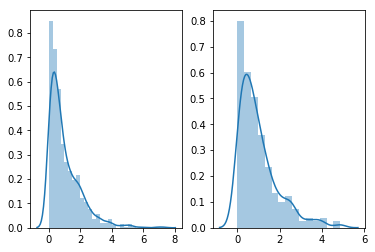

In [1]:
## In this notebook I talk about scaling and normalizing data. 
## This minimal example shows how to use a Box Cox transformation to normalize both trianing and testing data. :)
  
# import modules
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# generate non-normal data
original_data = np.random.exponential(size = 1000)

# split into testing & training data
train,test = train_test_split(original_data, shuffle=False)

# transform training data & save lambda value
train_data,fitted_lambda = stats.boxcox(train)

# use lambda value to transform test data
test_data = stats.boxcox(test, fitted_lambda)

print('lambda=',fitted_lambda)
# (optional) plot train & test
fig, ax=plt.subplots(1,2)
sns.distplot(train, ax=ax[0])
sns.distplot(test, ax=ax[1])



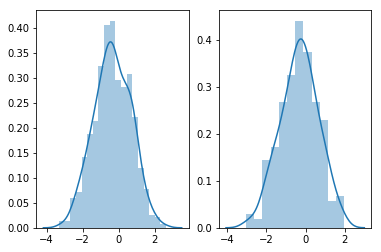

In [2]:
fig, ax=plt.subplots(1,2)
sns.distplot(train_data, ax=ax[0])
sns.distplot(test_data, ax=ax[1])

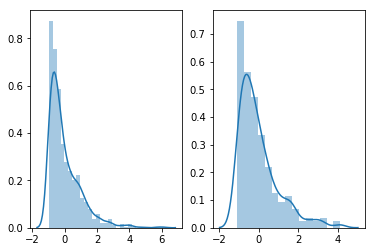

In [8]:
# after standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(train.reshape(-1, 1))
x_test_sc = scaler.fit_transform(test.reshape(-1, 1))

fig, ax=plt.subplots(1,2)
sns.distplot(x_train_sc, ax=ax[0])
sns.distplot(x_test_sc, ax=ax[1])

In [0]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Box-Cox transformation
cr_yrs_log = stats.boxcox(cr_yrs, lmbda=0)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_log)
plt.show()

### Outlier
- Detect outliers is by visualizing them graphically
  - use sns.boxplot to visualizing outliers 
  - IQR
  - 3Q +/- 1.5 IQR --> outliner
  - Another convenient way for handling outliers is by calculating the Z-score which gives a threshold for outliers approximately +/-3 standard deviations away from the mean.
  - calculating the Z-score using the scipy.stats module, omitting as well as replacing outliers using the mstats module from scipy.stats.




In [0]:
import scipy.stats 

# Print: before dropping
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())

# Create index of rows to keep
idx = (np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)  # filter zscore <3 in numerical features

# Concatenate numeric and categoric subsets
ld_out_drop = pd.concat([numeric_cols.loc[idx], categoric_cols.loc[idx]], axis=1)

In [0]:
### Winsorize Monthly Debt with 5% upper and lower limits and print the mean, median and max before and after.

# Print: before winsorize
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Winsorize numeric columns
debt_win = mstats.winsorize(loan_data['Monthly Debt'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Print: after winsorize
print(debt_out.mean())
print(debt_out.median())
print(debt_out.max())

In [0]:
##Find the median of the values of Monthly Debt that are lower than 2120 and replace outliers with it
# Print: before replace with median
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Find median
median = loan_data.loc[loan_data['Monthly Debt'] < 2120, 'Monthly Debt'].median()
loan_data['Monthly Debt'] = np.where(loan_data['Monthly Debt'] > 2120, median, loan_data['Monthly Debt'])

print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

- standardization
(Z score)
- normalization

In [0]:
# Z-score standardization
# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Instantiate
scaler = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([numeric_cols_scaledDF, categoric_cols], axis=1)
print(final_DF.head())


### Regression: feature selection

Feature selection methods
- Filter: Rank features based on statistical performance
- Wrapper: Use an ML method to evaluate performance
- Embedded: Iterative modeltraining to extract features
- Feature importance:tree-based ML models


1) Filter method: correlation
- Create correlation matrix with diabetes and a heatmap, then subset the features which have greater than 50% correlation.

In [0]:
# Create correlation matrix and print it
cor = diabetes.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["progression"])

#Selecting highly correlated features
best_features = cor_target[cor_target> 0.5]
print(best_features)

2) wrapper methods: feature selection using RFECV
- Instantiate a linear kernel SVR estimator and a feature selector with 5 cross-validations, fit to features and target.

In [0]:
# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

3) Lasso 
- Drop the unimportant column found in step 2 from X and instantiate a LarsCV object and fit it to your data.

In [0]:
# Import modules
from sklearn.linear_model import LarsCV

# Drop feature suggested not important in step 2
X = diabetes.drop('sex', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

4) tree based method (better method!)


In [0]:
# Import
from sklearn.ensemble import RandomForestRegressor

# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X, y)

# Print
print(diabetes.columns)
print(rf_mod.feature_importances_)

In [0]:
# Import
from sklearn.ensemble import ExtraTreesRegressor

# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X,y)

# Print
print(diabetes.columns)
print(xt_mod.feature_importances_)

### Regularization
- Lasso (L1)
- Ridge (L2)
- ElasticNet(L1+L2)

-- Lasso uses the l-1 norm corresponding to the penalty parameter and the absolute value of the coefficients. Ridge regression performs l2 regularization, also known as l2-norm, which adds a penalty term to ordinary least squares using the penalty parameter and the sum of the squared coefficients.


In [0]:
### Lasso
# Import modules
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Instantiate lasso, fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_true= y_test, y_pred=lasso.predict(X_test)))

In [0]:
### Ridge regularization
# Import modules
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)

# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))

### Feature engineering: Classifcation

In [0]:
# Create X matrix and y array
X = loan_data.drop('Loan Status', axis=1)
y = loan_data['Loan Status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic = LogisticRegression()

# Fit
logistic.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic.predict(X_test)))

In [0]:
# Create dti_ratio variable
monthly_income = loan_data["Annual Income"]/12
loan_data["dti_ratio"] = loan_data["Monthly Debt"]/monthly_income * 100
loan_data = loan_data.drop(["Monthly Debt","Annual Income"], axis=1)

# Replace target variable levels
loan_data["Loan Status"] = loan_data["Loan Status"].replace({'Fully Paid': 0, 
                                            'Charged Off': 1})

# One-hot encode categorical variables
loan_data = pd.get_dummies(data=loan_data)

# Print
print(loan_data.head())

# Create X matrix and y array
X = loans_dti.drop("Loan Status", axis=1)
y = loans_dti["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic_dti = LogisticRegression()

# Fit
logistic_dti.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic_dti.predict(X_test)))

### Ensemble methods

- bagging (bootstrap aggregation) - decrease variance (overfit)
- boosting - decrease bias (underfit)
- stacking


In [0]:
### bagging

# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)  # use decision tree by default

# Fit
bagged_fit = bagged_model.fit(X_train, y_train)

# Predict
bagged_pred = bagged_model.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, bagged_pred))


In [0]:
### boostering

# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_fit = boosted_model.fit(X_train, y_train)

# Predict
boosted_pred = boosted_model.predict(X_test)

# Print model accuracy
print(accuracy_score(y_test, boosted_pred))

### Dimensionality reduction: feature extraction

In [0]:
### PCA
# Import module
from sklearn.decomposition import PCA

# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

# PCA
pca = PCA(n_components=3)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

In [0]:
# Import module
from sklearn.decomposition import TruncatedSVD

# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

# PCA
svd = TruncatedSVD(n_components=3)

# Fit and transform
principalComponents = svd.fit_transform(X)

# Print ratio of variance explained
print(svd.explained_variance_ratio_)

visulization

In [0]:
# t-sne with loan data
from sklearn.manifold import TSNE
import seaborn as sns
loans = pd.read_csv('loans_dataset.csv')
# Feature matrix
X = loans.drop('Loan Status', axis=1)
tsne = TSNE(n_components=2, verbose=1, perplexity=40)
tsne_results = tsne.fit_transform(X)
loans['t-SNE-PC-one'] = tsne_results[:,0]
loans['t-SNE-PC-two'] = tsne_results[:,1]

# t-sne viz
plt.figure(figsize=(16,10))
sns.scatterplot(
x="t-SNE-PC-one", y="t-SNE-PC-two",
hue="Loan Status",
palette=sns.color_palette(["grey","blue"]),
data=loans,
legend="full",
alpha=0.3
)

In [0]:
targets = [0, 1]
colors = ['r', 'b']

# For loop to create plot
for target, color in zip(targets,colors):
    indicesToKeep = loan_data_PCA['Loan Status'] == target
    ax.scatter(loan_data_PCA.loc[indicesToKeep, 'principal component 1']
               , loan_data_PCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

# Legend    
ax.legend(targets)
ax.grid()
plt.show()

How to find the best PCA components? 

- use cumulative variance to determine the percentage of explained variance ratio for PCA components

In [0]:
# Remove target variable
X = loan_data.drop('Loan Status', axis=1)

# Instantiate
pca = PCA(n_components=10)

# Fit and transform
principalComponents = pca.fit_transform(X)

# List principal components names
principal_components = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

# Create a DataFrame
pca_df = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_,
             'PC':principal_components})

# Plot DataFrame (scree plot)
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.show()

# Instantiate, fit and transform
pca2 = PCA()
principalComponents2 = pca2.fit_transform(X)

# Assign variance explained
var = pca2.explained_variance_ratio_

# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()



### Clustering analysis: selecting the right clustering algorithm


K-means clustering



In [0]:
# Import module
from sklearn.cluster import KMeans

# Create feature matrix
X = diabetes.drop("progression", axis=1)

# Instantiate
kmeans = KMeans(n_clusters=20, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 20 clusters is", kmeans.inertia_)

Hierarchical agglomerative clustering

In [0]:
# Import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

# Create clusters and fit
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
hc.fit(X)

# Print number of clusters
print(hc.n_clusters_)

optimal k
1) silhouette_score (-1 ~ 1, 1 -->the best, -1--> the worse)


In [0]:
# Import modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Feature matrix
X = diabetes.drop("progression", axis=1)

# For loop
for n_clusters in range(2,9):
    kmeans = KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

2) elbow method

In [0]:
# Create empty list
sum_of_squared_distances = []

# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Model Generalization: bootstrapping and cross-validation


GridsearchCV

In [0]:
# Import modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=123)

# Instantiate, Fit, Predict
loans_clf = DecisionTreeClassifier() 
loans_clf.fit(X_train, y_train)
y_pred = loans_clf.predict(X_test)

# Evaluation metric
print("Decision Tree Accuracy: {}".format(accuracy_score(y_test,y_pred)))

In [0]:
# Import modules
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10]}

# Instantiate classifier and GridSearchCV, fit
loans_clf = DecisionTreeClassifier()
dtree_cv = GridSearchCV(loans_clf, param_grid, cv=5)
fit = dtree_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Decision Tree Parameter: {}".format(dtree_cv.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(dtree_cv.best_score_))

Random Forest (bootstrap)

In [0]:
# Import modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=123)

# Instantiate, Fit, Predict
loans_rf = RandomForestClassifier() 
loans_rf.fit(X_train, y_train)
y_pred = loans_rf.predict(X_test)

# Evaluation metric
print("Random Forest Accuracy: {}".format(accuracy_score(y_test,y_pred)))

In [0]:
# Import modules
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10],"max_features": [10, 20, 30]}

# Instantiate classifier and GridSearchCV, fit
loans_rf = RandomForestClassifier()
rf_cv = GridSearchCV(loans_rf, param_grid, cv=5)
fit = rf_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Accuracy: {}".format(rf_cv.best_score_))

### Model evaluation: imbalanced classification models

Imbalanced class metrics


In [0]:
# Import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate, fit, predict
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("F1: {}".format(f1_score(y_test, y_pred)))

Resampling techniques

In [0]:
### Resample the minority class, concatenate it with the majority class.
# Upsample minority, combine with majority
loans_upsampled = resample(deny, replace=True, n_samples=len(approve), random_state=123)
upsampled = pd.concat([approve, loans_upsampled])

# Instantiate logistic regression, fit, predict
loan_lr_up = LogisticRegression(solver='liblinear')
loan_lr_up.fit(X_train_up, y_train_up)
upsampled_y_pred = loan_lr_up.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, upsampled_y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, upsampled_y_pred)))
print("Precision: {}".format(precision_score(y_test, upsampled_y_pred)))
print("Recall: {}".format(recall_score(y_test, upsampled_y_pred)))
print("F1: {}".format(f1_score(y_test, upsampled_y_pred)))




Model selection: regression models

**multicollinearity**

Techniques to address multicollinearity
- Correlation matrix
- Heatmap of correlations
- Calculate the variance ination factor (VIF)
- Introduce penalizations (Ridge, Lasso)
- PCA




In [0]:
# Instantiate, fit, predict
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
y_pred = lin_mod.predict(X_test)

# Coefficient estimates
print('Coefficients: \n', lin_mod.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test, y_pred))

# Correlation matrix
diab_corr = diabetes.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corr, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corr)

In [0]:
# Feature engineering
diabetes['s1_s2'] = diabetes['s1'] * diabetes['s2']
diabetes = diabetes.drop(['s1','s2'], axis=1)

# Print variable names
print(diabetes.columns)

# Train/test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123)
# Instantiate, fit, predict
lin_mod2 = LinearRegression()
lin_mod2.fit(X_train2, y_train2)
y_pred2 = lin_mod2.predict(X_test2)

# Coefficient estimates
print('Coefficients: \n', lin_mod2.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test2, y_pred2))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test2, y_pred2
                                         
                                         

PCA


In [0]:
# Import
from sklearn.decomposition import PCA

# Instantiate
pca = PCA()

# Fit on train
pca.fit(X_train)

# Transform train and test
X_trainPCA = pca.transform(X_train)
X_testPCA = pca.transform(X_test)

# Import
from sklearn.linear_model import LinearRegression

# Instantiate, fit, predict
LinRegr = LinearRegression()
LinRegr.fit(X_trainPCA, y_train)
predictions = LinRegr.predict(X_testPCA)

# The coefficients
print('Coefficients: \n', LinRegr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions ))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))


# Correlation matrix
X_trainPCA = pd.DataFrame(X_trainPCA)
diab_corrPCA = X_trainPCA.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corrPCA, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corrPCA)



Model selection: ensemble models


In [0]:
# random forest

# Import
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate, fit, predict
rf_model = RandomForestClassifier(n_estimators=50, random_state=123, oob_score = True)
rf_fit = rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("Random Forest Accuracy: {}".format(accuracy_score(y_test, rf_pred)))
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, rf_pred)))
print("Precision: {}".format(precision_score(y_test, rf_pred)))
print("Recall: {}".format(recall_score(y_test, rf_pred)))
print("F1: {}".format(f1_score(y_test, rf_pred)))



In [0]:
## Gradient Boosting
# Import
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate, fit, predict
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01,random_state=123)
gb_fit = gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Print evaluation metrics
print("Gradient Boosting Accuracy: {}".format(accuracy_score(y_test, gb_pred )))
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, gb_pred )))
print("Precision: {}".format(precision_score(y_test, gb_pred )))
print("Recall: {}".format(recall_score(y_test, gb_pred )))
print("F1: {}".format(f1_score(y_test, gb_pred )))